<a href="https://colab.research.google.com/github/pctablet505/datascience-assignment/blob/main/Data_Science_Lab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b2/Birsa_Institute_of_Technology_Sindri_logo.png/220px-Birsa_Institute_of_Technology_Sindri_logo.png">
<h1>Data Science Lab Assignment</h1>
</center>


|||
|---|---|
|Lab|Data Science|
|Professor|Tapan Nayek|
|Name|Rahul Kumar|
|Roll Number|**1809022**|
|Branch|Computer Science|
|Signature|rahul kumar|



# List of experiments
|Sl No|Experiment|Page No|Remark|
| :---- | :---: | :--- | :---: |
|1. |Introduction to Python tools for data science|||
|2.| Basic Statistics tools and Visualization tools  in Python |||
|3.| K-means Clustering |||
|4.| Linear Regression |||
|5.| Logistic Regression|||
|6.| Naive Bayesian Classifier|||
|7.| Decision Trees|||
|8.| Simulate Principal component analysis |||
|9.| Compare the efficiency, precision and recall for any three algorithm with  common data set|||



# Introductioin to Python tools for data science
**Aim:-** To demonstrate the use of different pythont tools for data science

**Algorithm Used:-** None

**Python Program:-**

```
# dummy code
print(hello world)
```

**Evaluation of model metrics :-**  None in this experiment





---

# Naive Bayesian Classifier
**Aim:-** To classify text data into different categories

**Algorithm Used:-** Naive Bayes algorithm

**Dataset Used:-** IMDb 50k Review Dataset

[https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)



**Python Program:-**

```
It has been implemented below
```

**Evaluation of model metrics :-**  Accuracy, Precision, Recall

## Downloading the dataset and preprocessing it



In [ ]:
#Downloading the dataset
%cd Downloads/
%pwd



C:\Users\pctab\Downloads


'C:\\Users\\pctab\\Downloads'

In [ ]:
# import the libraries
import re

import pandas as pd
import numpy as np

from collections import namedtuple, defaultdict, Counter
import string
from math import log

from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords
import nltk.tokenize as tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import confusion_matrix
import sklearn




## Preparing the dataset

In [ ]:
# prepare the dataset
df=pd.read_csv('IMDB Dataset.csv')
df.sentiment.replace({'positive':1,'negative':0},inplace=True)
train_df,test_df=sklearn.model_selection.train_test_split(df)

In [ ]:
train_df.head()

,review,sentiment
4338,Against my own better judgment I went to see t...,0
4741,The moral of this show is that bad eating habi...,0
39461,"I have watched two episodes so far, I really l...",1
34767,This film is not at all as bad as some people ...,1
39907,"...and Ethel Merman buffs, too, will love her ...",0


In [ ]:
#download relevant nltk modules
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#define set of stopwords
stopwords_set=set(stopwords.words('english'))




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pctab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pctab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pctab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Prepare the vocabulary

In [ ]:
# Prepare the vocabulary
vocabulary=Counter()
vocabulary_size=10000

def remove_html_tags(text):
    """Remove html tags from a string"""
    clean=re.compile('<.*?>')
    return re.sub(clean,'',text)

def preprocess_text(text):
    text=remove_html_tags(text)    
    lametizer=WordNetLemmatizer()
    stemmer=nltk.PorterStemmer()
    result=[]
    words=tokenize.word_tokenize(text)
    for word in words:
            word=lametizer.lemmatize(word)
            word=stemmer.stem(word)   
            if word not in stopwords_set and word not in string.punctuation and word.isalpha():
                result.append(word)
    return result


def prepare_vocabulary():  
    for text in train_df['review']:
        words=preprocess_text(text)
        for word in words:
            vocabulary[word]+=1

    




In [ ]:
%%time
prepare_vocabulary()
#vocabulary=Counter({word:count for word,count in vocabulary.most_common(vocabulary_size)})

Wall time: 3min 23s


In [ ]:
#vocabulary

In [ ]:
print('Total number of words in vocabulary is :',len(vocabulary))


Total number of words in vocabulary is : 60780


In [ ]:
word_indices={word:i for i,word in enumerate(vocabulary)}

In [ ]:
# prepare the word count table
word_count_table=Counter()

def prepare_word_count_table():
    for i in range(len(train_df)):
        words=preprocess_text(train_df.iloc[i].review)
        if train_df.iloc[i].sentiment==0:
            for word in words:
                if word in vocabulary:
                    ind=word_indices[word]
                    word_count_table[(ind,0)]+=1
        else:
            for word in words:
                if word in vocabulary:
                    ind=word_indices[word]
                    word_count_table[(ind,1)]+=1

        

In [ ]:
%%time
prepare_word_count_table()

Wall time: 3min 32s


## Using bayes rule to implement Naive Bayesian Classifier

**Assumption :** It assumes that each event is independent of each other, which isn't true, but still works good enough to produce usable results.


**Bayes Rule :-** 

$ P(A|B)=\frac{P(B|A) \times P(A)}{P(B)} $

$ => $ $ log(P(A|B)) = log(P(B|A)) + log(P(A)) - log(P(B)) $

**Log-Likelihood :-**

$ log(P(Genre|w_1,w_2, ... w_n)) = \sum_{i=1}^{n}log(P(w_i|Genre) + n \times log(P(Genre)) - \sum_{i=1}^{n}log(P(w_i)$




In [ ]:
# Calculate the log priors
log_priors=defaultdict(lambda:defaultdict(float))

for word in vocabulary:
    ind=word_indices[word]
    for sentiment in [0,1]:
        log_priors[ind][sentiment]=log(word_count_table[ind,sentiment]+1)-log(word_count_table[ind,0]+word_count_table[ind,1]+2)



negative_count=train_df.sentiment.value_counts()[0]
positive_count=train_df.sentiment.value_counts()[1]

log_priors_class={0:np.log(negative_count+1)-np.log(positive_count+negative_count+2),
                  1:np.log(positive_count+1)-np.log(positive_count+negative_count+2)}

total_word_counts=sum(word_count_table.values())

log_priors_words=defaultdict(float)

for word in vocabulary:
    ind=word_indices[word]
    log_priors_words[ind]=np.log(vocabulary[word]/total_word_counts)



In [ ]:
train_df.sentiment.value_counts()

1    18759
0    18741
Name: sentiment, dtype: int64

## Make the predictions

In [ ]:
#define the prediction function
def softmax(log_posteriors):
    
    probabilities={}
    s=sum([np.exp(x) for x in log_posteriors.values()])
    for x in log_posteriors:
        probabilities[x]=np.exp(log_posteriors[x])/s
    
    
    print(sum(probabilities.values()))
    print(sorted(probabilities.items(),key=lambda x:x[1],reverse=True))
def predict(text):
    words=preprocess_text(text.lower())
    posteriors=defaultdict(float)
    for word in words:
        if word in vocabulary:
            ind=word_indices[word]
            for sentiment in [0,1]:
                posteriors[sentiment]+= log_priors[ind][sentiment] + log_priors_class[sentiment] - log_priors_words[ind]
    m=float('-inf')
    res=None
    for sentiment in [0,1]:
        if posteriors[sentiment]>m:
            m=posteriors[sentiment]
            res=sentiment
    return res
    




## Testing the model

In [ ]:
%%time

predictions={}
actual={}


for i  in range(len(test_df)):
    review=test_df.iloc[i].review
    y=predict(review)
    predictions[i]=y
    actual[i]=test_df.iloc[i].sentiment



result=[(id,predictions[id]==actual[id]) for id in predictions]

# Calculate the accuracy
accuracy = sum([x[1] for x in result])/len(result)


        




Wall time: 1min 11s


In [ ]:
print('Accuracy of model : {:.3f}%'.format(accuracy*100))
truth_counts=defaultdict(int)
prediction_counts=defaultdict(int)


Accuracy of model : 84.360%


In [ ]:
a=sorted(predictions.items())
a=[x[1] for x in a]
b=sorted(actual.items())
b=[x[1] for x in b]
print('Accuracy is: ',sklearn.metrics.accuracy_score(b,a))
print('Precision is: ',sklearn.metrics.precision_score(b,a))
print('Recall is: ',sklearn.metrics.recall_score(b,a))

Accuracy is:  0.8436
Precision is:  0.827375496486404
Recall is:  0.8678096458900817


#Evaluation of model
After using the naive bayes classifier for spam and not spam class classification, <br>
we got :-

**accuracy** of **84.36%**

**Precision** of **82.73%**

**Recall** of **86.78%**

which is a very nice performance for such a simple model.

In [ ]:
import json
import pickle
data={'log_prior_words':log_priors_words,
      'log_prior_class':log_priors_class,
      'word_count_table':word_count_table,
      'vocabulary':vocabulary}
with open('naive bayes sentiment classifier','wb') as f:
    pickle.dump(data,f)





---
<pre>

























</pre>
---

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


# K Means Clustering
**Aim:-** To demonstrate the working of k-means Clustering algorithm

**Algorithm Used:-** Linear Regression

**Dataset Used:-** My own selfie is used as data set for this taks.



**Python Program:-**

```
It has been implemented below
```

**Evaluation of model metrics :-**  Manual Evaluation by seeing the image

### Defining the Gaussian Mixture model and utility functions

In [3]:
from typing import NamedTuple, Tuple
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Arc


class GaussianMixture(NamedTuple):
    """Tuple holding a gaussian mixture"""
    mu: np.ndarray  # (K, d) array - each row corresponds to a gaussian component mean
    # (K, ) array - each row corresponds to the variance of a component
    var: np.ndarray
    # (K, ) array = each row corresponds to the weight of a component
    p: np.ndarray


def init(X: np.ndarray, K: int,
         seed: int = 0) -> Tuple[GaussianMixture, np.ndarray]:
    """Initializes the mixture model with random points as initial
    means and uniform assingments

    Args:
        X: (n, d) array holding the data
        K: number of components
        seed: random seed

    Returns:
        mixture: the initialized gaussian mixture
        post: (n, K) array holding the soft counts
            for all components for all examples

    """
    np.random.seed(seed)
    n, _ = X.shape
    p = np.ones(K,dtype=np.float64) / K

    # select K random points as initial means
    mu = X[np.random.choice(n, K, replace=False)]
    var = np.zeros(K,dtype=np.float64)
    # Compute variance
    for j in range(K):
        var[j] = ((X - mu[j])**2).mean()

    mixture = GaussianMixture(mu, var, p)
    post = np.ones((n, K)) / K

    return mixture, post


def plot(X: np.ndarray, mixture: GaussianMixture, post: np.ndarray,
         title: str):
    """Plots the mixture model for 2D data"""
    _, K = post.shape

    percent = post / post.sum(axis=1).reshape(-1, 1)
    fig, ax = plt.subplots()
    ax.title.set_text(title)
    ax.set_xlim((-20, 20))
    ax.set_ylim((-20, 20))
    r = 0.25
    color = ["r", "b", "k", "y", "m", "c"]
    for i, point in enumerate(X):
        theta = 0
        for j in range(K):
            offset = percent[i, j] * 360
            arc = Arc(point,
                      r,
                      r,
                      0,
                      theta,
                      theta + offset,
                      edgecolor=color[j])
            ax.add_patch(arc)
            theta += offset
    for j in range(K):
        mu = mixture.mu[j]
        sigma = np.sqrt(mixture.var[j])
        circle = Circle(mu, sigma, color=color[j], fill=False)
        ax.add_patch(circle)
        legend = "mu = ({:0.2f}, {:0.2f})\n stdv = {:0.2f}".format(
            mu[0], mu[1], sigma)
        ax.text(mu[0], mu[1], legend)
    plt.axis('equal')
    plt.show()


def rmse(X, Y):
    return np.sqrt(np.mean((X - Y)**2))


def bic(X: np.ndarray, mixture: GaussianMixture,
        log_likelihood: float) -> float:
    """Computes the Bayesian Information Criterion for a
    mixture of gaussians

    Args:
        X: (n, d) array holding the data
        mixture: a mixture of spherical gaussian
        log_likelihood: the log-likelihood of the data

    Returns:
        float: the BIC for this mixture
    """
    n, d = X.shape
    K = len(mixture.p)
    l = log_likelihood
    """
    no of free parameters in Mu= k*d
    no of free parameters in var=K
    no of free parameters in P = K-1 
    (1 term can be represented as 1-sum of others)"""

    no_free_parameters = d*K+2*K-1

    return l-(1/2)*no_free_parameters*np.log(n)

### K-Means algorithm

In [12]:
'''Code for K-Means algorithm'''

def estep(X: np.ndarray, mixture: GaussianMixture) -> np.ndarray:
    """E-step: Assigns each datapoint to the gaussian component with the
    closest mean

    Args:
        X: (n, d) array holding the data
        mixture: the current gaussian mixture

    Returns:
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples

        """
    n, _ = X.shape
    K, _ = mixture.mu.shape
    post = np.zeros((n, K))

    for i in range(n):
        tiled_vector = np.tile(X[i, :], (K, 1))
        sse = ((tiled_vector - mixture.mu)**2).sum(axis=1)
        j = np.argmin(sse)
        post[i, j] = 1

    return post


def mstep(X: np.ndarray, post: np.ndarray) -> Tuple[GaussianMixture, float]:
    """M-step: Updates the gaussian mixture. Each cluster
    yields a component mean and variance.

    Args: X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
        float: the distortion cost for the current assignment
    """
    n, d = X.shape
    _, K = post.shape
    eps=1e-16

    n_hat = post.sum(axis=0)
    p = n_hat / (n+eps)

    cost = 0
    mu = np.zeros((K, d))
    var = np.zeros(K)

    for j in range(K):
        mu[j, :] = post[:, j] @ X / (n_hat[j]+eps)
        sse = ((mu[j] - X)**2).sum(axis=1) @ post[:, j]
        cost += sse
        var[j] = sse / (d * n_hat[j]+eps)

    return GaussianMixture(mu, var, p), cost


def run(X: np.ndarray, mixture: GaussianMixture,
        post: np.ndarray) -> Tuple[GaussianMixture, np.ndarray, float]:
    """Runs the mixture model

    Args:
        X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples
        float: distortion cost of the current assignment
    """

    prev_cost = None
    cost = None
    #while (prev_cost is None or prev_cost - cost > 1e-4):
    for i in range(30):
        prev_cost = cost
        post = estep(X, mixture)
        mixture, cost = mstep(X, post)

    return mixture, post, cost

KeyboardInterrupt: ignored

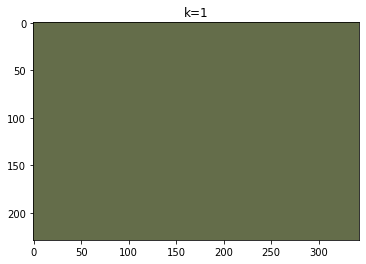

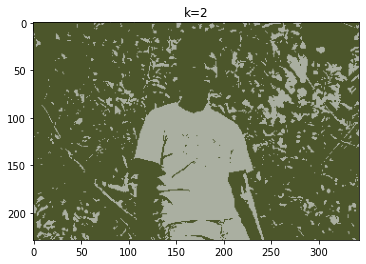

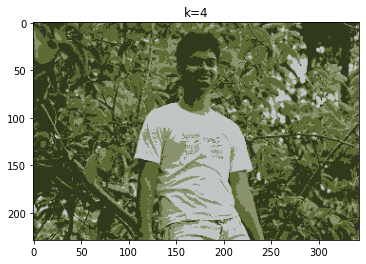

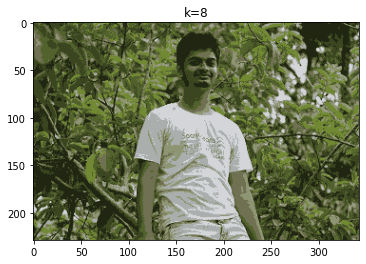

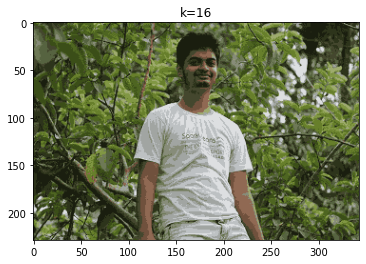

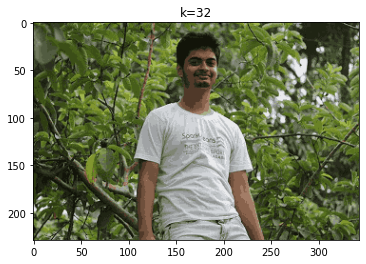

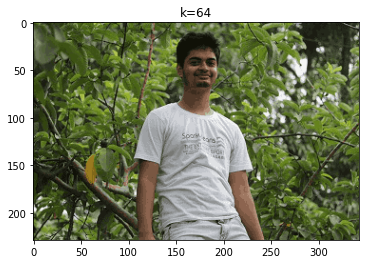

In [11]:
import matplotlib.pyplot as plt
img=plt.imread("selfie.jpg")
import tensorflow as tf
with tf.device('tpu'):
    for i in range(11):
        K=2**i
        m,n,d=img.shape

        X=img.reshape(m*n,d)
        mixture=post=cost=X_pred=None 
        mixture, post = init(X, K)
        mixture,post, cost = run(X, mixture,post)
        mu=mixture.mu
        clusters=post.argmax(axis=1)
        X=mu[clusters]
        X=X.reshape(m,n,d)
        X=X.astype('uint8')
        fname='K= {}.jpg'.format(K)
        plt.imsave(fname,X)
        plt.figure(num='K = {}'.format(K))
        plt.imshow(X)
        plt.title('k={}'.format(K))

plt.figure(num='Original image')
plt.imshow(img)
plt.title('Original Image')


KeyboardInterrupt: ignored

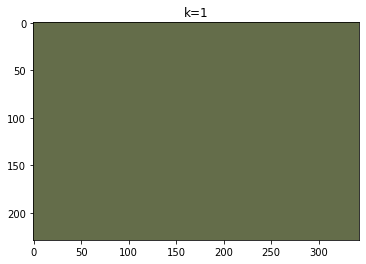

In [13]:
import matplotlib.pyplot as plt
img=plt.imread("selfie.jpg")
import tensorflow as tf
with tf.device('tpu'):
    for i in range(11):
        K=2**i
        m,n,d=img.shape

        X=img.reshape(m*n,d)
        mixture=post=cost=X_pred=None 
        mixture, post = init(X, K)
        mixture,post, cost = run(X, mixture,post)
        mu=mixture.mu
        clusters=post.argmax(axis=1)
        X=mu[clusters]
        X=X.reshape(m,n,d)
        X=X.astype('uint8')
        fname='K= {}.jpg'.format(K)
        plt.imsave(fname,X)
        plt.figure(num='K = {}'.format(K))
        plt.imshow(X)
        plt.title('k={}'.format(K))

plt.figure(num='Original image')
plt.imshow(img)
plt.title('Original Image')


---
<pre>

























</pre>
---

# Linear Regression
**Aim:-** To predict the risk for Heart

**Algorithm Used:-** Linear Regression

**Dataset Used:-** ASCVD (Heart) Risk| Kaggle

[https://www.kaggle.com/mokar2001/ascvd-heart-risk](https://www.kaggle.com/mokar2001/ascvd-heart-risk)



**Python Program:-**

```
It has been implemented below
```

**Evaluation of model metrics :-**  MSE, MAE

In [ ]:
%cd
%cd Downloads/
%reset

C:\Users\pctab
C:\Users\pctab\Downloads
Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [ ]:
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.linear_model

In [ ]:
df=pd.read_csv('heartRisk.csv')
Y=df[['Risk']]
X=df.drop(['Risk'],axis=1)
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y)
df.describe()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.49000,0.530000,0.516000,0.522000,0.495000,59.107000,144.249000,164.043000,59.603000,19.667000
std,0.50015,0.499349,0.499994,0.499766,0.500225,11.536492,31.774528,20.329891,23.863505,17.043941
min,0.00000,0.000000,0.000000,0.000000,0.000000,40.000000,90.000000,130.000000,20.000000,0.100000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,49.000000,117.000000,146.000000,39.000000,6.300000
50%,0.00000,1.000000,1.000000,1.000000,0.000000,59.000000,144.000000,164.000000,59.000000,14.400000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,69.000000,171.000000,182.000000,81.000000,29.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,79.000000,200.000000,200.000000,100.000000,85.400000


In [ ]:
regressor=sklearn.linear_model.LinearRegression()
regressor.fit(X_train,Y_train)
predictions=regressor.predict(X_test)
print('Mean squared error',sklearn.metrics.mean_squared_error(Y_test,predictions))
print('Mean ablolute error',sklearn.metrics.mean_absolute_error(Y_test,predictions))

Mean squared error 50.334544579097496
Mean ablolute error 5.33330288087782


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


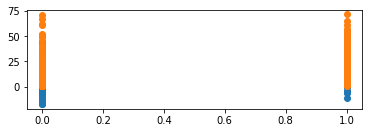

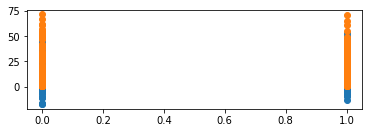

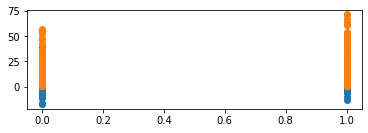

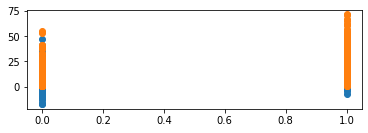

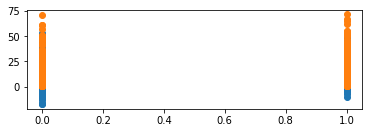

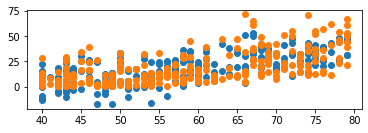

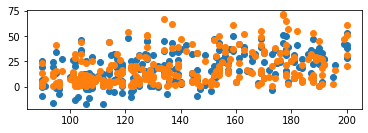

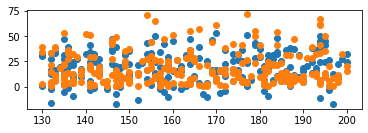

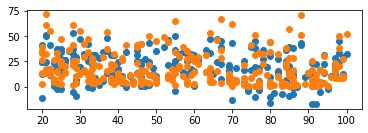

In [ ]:
for col in X_test.columns:
    plt.figure()
    plt.subplot(2,1,1)
    plt.scatter(X_test[col].values,predictions)
    plt.scatter(X_test[col].values,Y_test.values)

In [ ]:
#Lets use neural networks for better results


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing


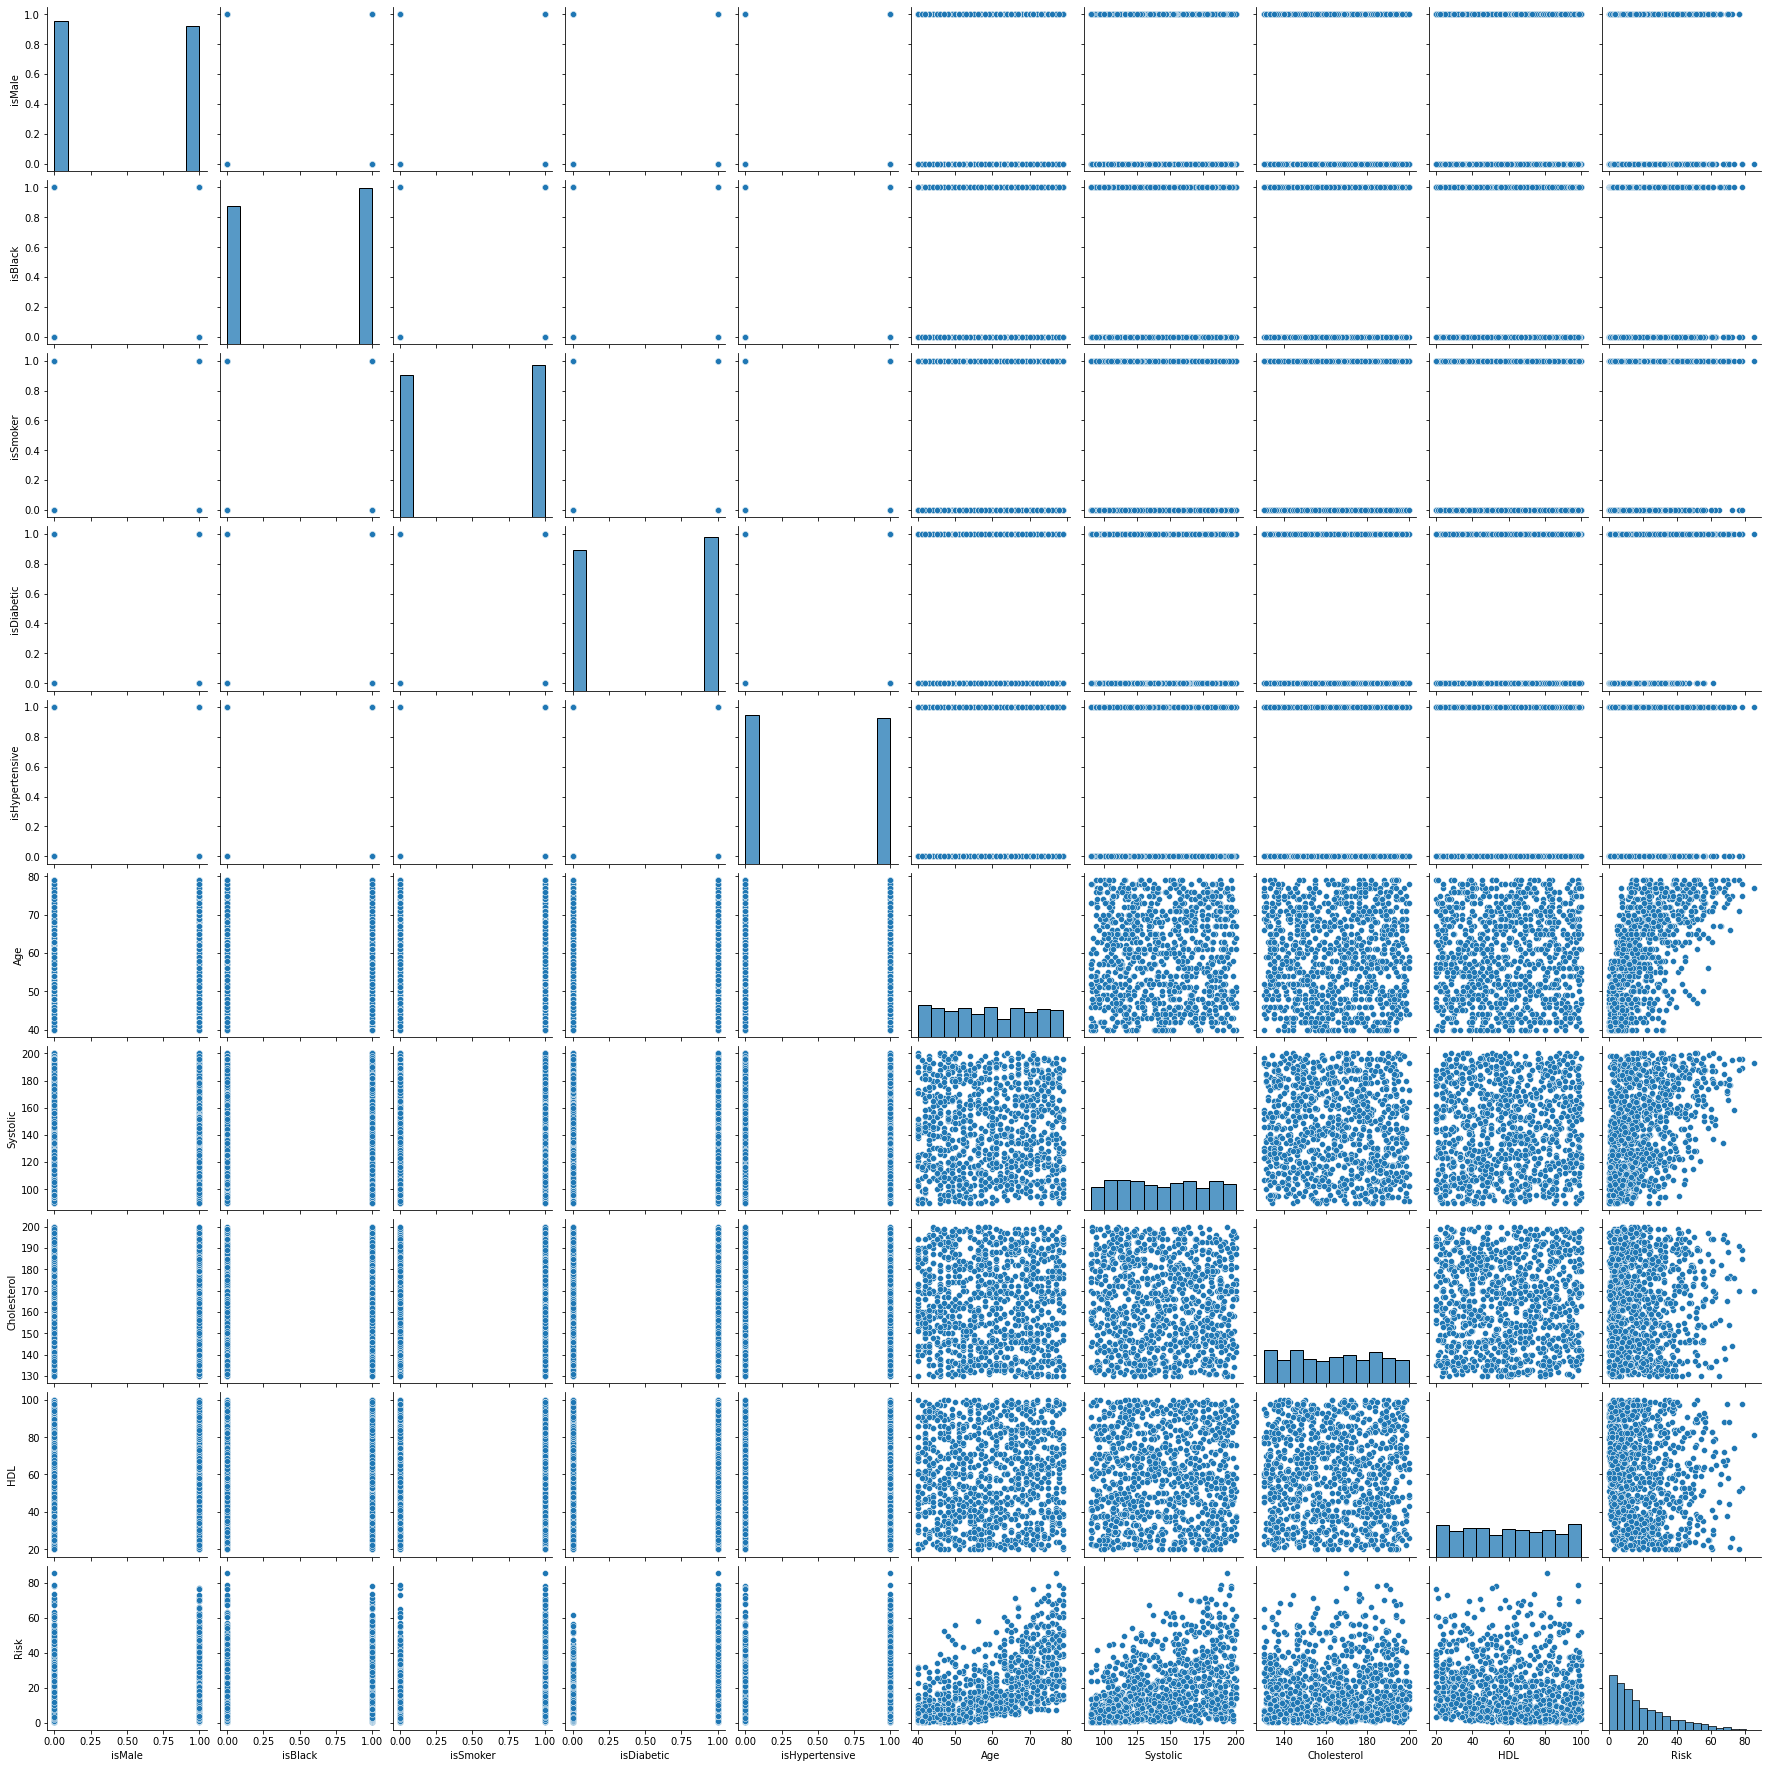

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

Index(['isMale', 'isBlack', 'isSmoker', 'isDiabetic', 'isHypertensive', 'Age',
       'Systolic', 'Cholesterol', 'HDL', 'Risk'],
      dtype='object')

In [ ]:
numeric=['Age', 'Systolic', 'Cholesterol', 'HDL', 'Risk']
categoricl=['isMale', 'isBlack', 'isSmoker', 'isDiabetic', 'isHypertensive']


In [ ]:
for col in numeric:
    X_train[col]=(X_train[col]-X_train[col].mean())/X_train[col].std()

C:\Users\pctab\AppData\Local\Temp/ipykernel_19180/1399047862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=(X_train[col]-X_train[col].mean())/X_train[col].std()


KeyError: ignored

In [ ]:
X_train

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL
913,1,1,0,1,0,-1.247685,0.238559,1.711320,1.209718
652,1,1,1,1,0,1.273886,1.617027,-0.843769,0.956615
867,0,1,1,1,0,-0.812931,1.617027,-0.057588,-1.068205
965,1,0,1,0,1,-0.465128,0.520518,0.089821,-0.055795
275,0,1,1,0,0,0.317428,-1.484527,0.433775,0.366043
...,...,...,...,...,...,...,...,...,...
446,0,1,0,0,1,-0.812931,-1.703828,-0.450678,-1.026022
83,0,1,0,0,1,1.621689,-0.231374,1.416502,0.787880
856,0,1,0,0,0,-0.986833,1.272410,-0.057588,1.040983
417,1,1,1,1,0,-1.160734,1.679684,-0.647224,-0.308898
